# PyOR Quantum
## Author: Vineeth Thalakottoor
## Introduction to Schrodinger Equation ODE Solver

In [1]:
# Define the source path
SourcePath = '/media/HD2/Vineeth/PostDoc_Simulations/Github/PyOR_V1/PyOR_Combined/Source_Doc'

# Add source path
import sys
sys.path.append(SourcePath)
import time
%matplotlib ipympl

# Import PyOR package
from PyOR_QuantumSystem import QuantumSystem as QunS
from PyOR_Hamiltonian import Hamiltonian
from PyOR_DensityMatrix import DensityMatrix
from PyOR_QuantumObject import QunObj
from PyOR_HardPulse import HardPulse
from PyOR_Basis import Basis
from PyOR_Evolution import Evolutions
from PyOR_Plotting import Plotting
import PyOR_SignalProcessing as Spro
from PyOR_QuantumLibrary import QuantumLibrary

In [2]:
# Define the spin system
Spin_list = {"A" : "H1"}
QS = QunS(Spin_list,PrintDefault=False)

# initialize the system
QS.Initialize()

### Set parameters

In [3]:
# Master Equation
QS.PropagationSpace = "Schrodinger"
QS.MasterEquation = "Redfield"

# B0 Field in Tesla, Static Magnetic field (B0) along Z
QS.B0 = 9.4

# Offset Frequency in rotating frame (Hz)
QS.OFFSET["A"] = 10.0

# Define initial and final Spin Temperature
QS.I_spintemp["A"] = 300.0
QS.F_spintemp["A"] = 300.0

# Relaxation Process
QS.Rprocess = "Phenomenological"
QS.R1 = 1
QS.R2 = 2

QS.Update()

Rotating frame frequencies: {'A': -2514706800.0}
Offset frequencies: {'A': 10.0}
Initial spin temperatures: {'A': 300.0}
Final spin temperatures: {'A': 300.0}
Radiation damping gain: {'A': 0}
Radiation damping phase: {'A': 0}

Rprocess = Phenomenological
RelaxParDipole_tau = 0.0
DipolePairs = []
RelaxParDipole_bIS = []


### Generate Hamiltonians

In [4]:
# generate Larmor Frequencies
QS.print_Larmor = True
Ham = Hamiltonian(QS)

Larmor Frequency in MHz:  [-400.22802765]


In [5]:
Hz = Ham.Zeeman_RotFrame()
Hz.Inverse2PI().matrix

Matrix([
[-4.9999999114647,               0],
[               0, 4.9999999114647]])

### Genrate initial state

In [6]:
QLib = QuantumLibrary(QS)

vec = QLib.Basis_Ket(2,0)

In [7]:
vec.matrix

Matrix([
[1.0],
[  0]])

In [8]:
# Rotate by 90 deg about X axis
vec = vec.Rotate(90,QS.Ax)

In [9]:
vec.Round(3).matrix

Matrix([
[   0.707],
[-0.707*I]])

## Evolution

In [10]:
QS.AcqDT = 0.0001
QS.AcqAQ = 5.0
QS.OdeMethod = 'DOP853'
QS.PropagationMethod = "Unitary Propagator"

EVol = Evolutions(QS,Ham)

start_time = time.time()
t, vec_t = EVol.Evolution(vec,vec,Hz)
end_time = time.time()
timetaken = end_time - start_time
print("Total time = %s seconds " % (timetaken))

Larmor Frequency in MHz:  [-400.22802765]
Total time = 0.09252357482910156 seconds 


## Expectation

In [11]:
det = QS.Ap

t, Mt = EVol.Expectation(vec_t,det)

## Plotting

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(<Figure size 1000x500 with 1 Axes>,
 <matplotlib.widgets.SpanSelector at 0x7f3b13350ef0>)

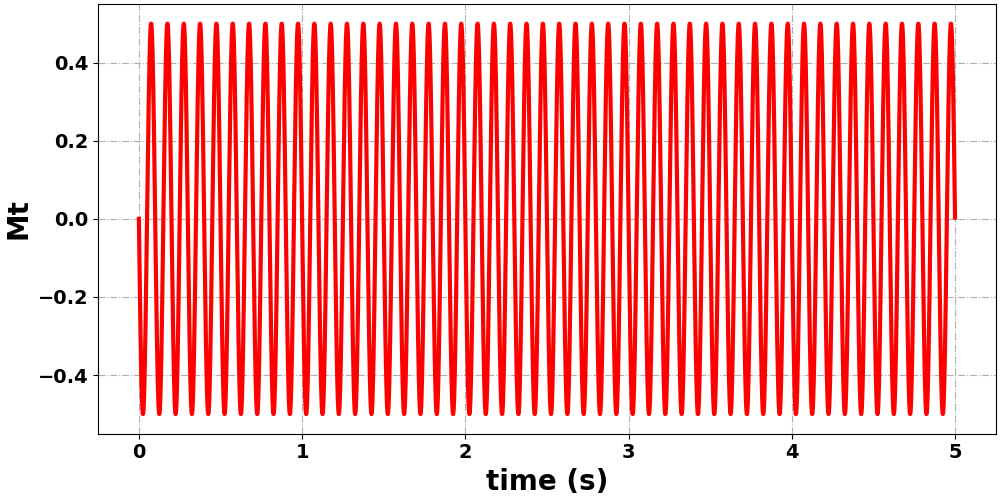

In [12]:
plot = Plotting(QS)
plot.PlotFigureSize = (10,5)
plot.PlotFontSize = 20
plot.Plotting_SpanSelector(1,t,Mt,"time (s)","Mt","red") 